In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drive/MyDrive/covid_data.csv")

In [3]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192072 entries, 0 to 192071
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    192072 non-null  object 
 1   continent                                   180907 non-null  object 
 2   location                                    192072 non-null  object 
 3   date                                        192072 non-null  object 
 4   total_cases                                 184521 non-null  float64
 5   new_cases                                   184230 non-null  float64
 6   new_cases_smoothed                          183056 non-null  float64
 7   total_deaths                                166037 non-null  float64
 8   new_deaths                                  166001 non-null  float64
 9   new_deaths_smoothed                         164838 non-null  float64
 

In [5]:
df.select_dtypes(include="object").isnull().sum()

iso_code           0
continent      11165
location           0
date               0
tests_units    87787
dtype: int64

In [6]:
df.describe(include="number")

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.845210e+05,1.842300e+05,1.830560e+05,1.660370e+05,166001.000000,164838.000000,183670.000000,183379.000000,182210.000000,165199.000000,...,119706.000000,118065.000000,77762.000000,140427.000000,179621.000000,154188.000000,6.553000e+03,6553.000000,6553.000000,6553.000000
mean,3.321440e+06,1.231478e+04,1.236325e+04,6.498894e+04,157.424058,158.398118,41902.837235,185.434375,185.829797,590.661480,...,10.643519,32.792406,50.921468,3.068617,73.649249,0.725205,4.093095e+04,9.773072,15.594497,1117.569401
std,2.086271e+07,8.711084e+04,8.558753e+04,3.385542e+05,788.984532,772.493838,77897.463831,946.257944,617.087990,876.043455,...,10.580264,13.530173,31.856101,2.520094,7.449497,0.149730,1.138387e+05,16.007568,28.965876,1563.316733
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,2.725000e+03,0.000000e+00,6.714000e+00,9.400000e+01,0.000000,0.143000,789.781250,0.000000,1.490000,23.602500,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,-1.100000e+01,-0.120000,-0.280000,-6.412607
50%,3.600400e+04,7.000000e+01,1.005710e+02,9.230000e+02,1.000000,2.000000,6573.637500,10.158000,19.088500,165.649000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,4.269400e+03,6.570000,7.460000,574.011450
75%,3.816670e+05,1.024000e+03,1.134607e+03,8.495000e+03,17.000000,19.143000,52084.443750,101.750000,128.946750,852.914000,...,19.300000,41.300000,83.241000,4.000000,79.070000,0.845000,2.786380e+04,14.700000,21.800000,1794.278748
max,5.323506e+08,4.079835e+06,3.437236e+06,6.300059e+06,18151.000000,14795.286000,706541.904000,208049.887000,37617.428000,6392.768000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.213593e+06,111.010000,375.000000,9725.192865


In [7]:
df.describe(include="object")

,iso_code,continent,location,date,tests_units
count,192072,180907,192072,192072,104285
unique,244,6,244,888,4
top,MEX,Africa,Mexico,2021-08-27,tests performed
freq,888,44533,888,243,78389


In [8]:
columns = ['new_cases','location','total_deaths','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand']

In [9]:
df[columns]

,new_cases,location,total_deaths,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,5.0,Afghanistan,NaN,NaN,NaN,37.746,0.5
1,0.0,Afghanistan,NaN,NaN,NaN,37.746,0.5
2,0.0,Afghanistan,NaN,NaN,NaN,37.746,0.5
3,0.0,Afghanistan,NaN,NaN,NaN,37.746,0.5
4,0.0,Afghanistan,NaN,NaN,NaN,37.746,0.5
...,...,...,...,...,...,...,...
192067,177.0,Zimbabwe,5508.0,1.6,30.7,36.791,1.7
192068,185.0,Zimbabwe,5509.0,1.6,30.7,36.791,1.7
192069,0.0,Zimbabwe,5509.0,1.6,30.7,36.791,1.7
192070,102.0,Zimbabwe,5510.0,1.6,30.7,36.791,1.7


In [10]:
df[columns].isnull().sum()

new_cases                       7842
location                           0
total_deaths                   26035
female_smokers                 72366
male_smokers                   74007
handwashing_facilities        114310
hospital_beds_per_thousand     51645
dtype: int64

In [11]:
df.select_dtypes(include = np.number).corr()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
total_cases,1.000000,0.748884,0.773657,0.945735,0.578960,0.600469,0.100772,0.020128,0.032128,0.122780,...,0.000222,-0.004586,0.032356,0.000072,0.015894,0.039699,0.771151,0.116991,0.010986,0.213654
new_cases,0.748884,1.000000,0.977856,0.729992,0.656228,0.646180,0.074084,0.070033,0.093005,0.084146,...,0.005679,0.000621,0.030179,0.012936,0.021250,0.043074,0.404771,0.059271,0.077013,0.100119
new_cases_smoothed,0.773657,0.977856,1.000000,0.747757,0.649169,0.662688,0.077866,0.061690,0.095211,0.086784,...,0.005699,0.000691,0.030681,0.013154,0.021574,0.043828,0.457196,0.047292,0.059233,0.105595
total_deaths,0.945735,0.729992,0.747757,1.000000,0.706275,0.729940,0.056341,0.007347,0.010083,0.136899,...,-0.007150,-0.002753,0.042043,-0.007490,0.015811,0.038043,0.928253,0.318747,0.081306,0.347269
new_deaths,0.578960,0.656228,0.649169,0.706275,1.000000,0.975141,-0.008748,0.009165,0.008206,0.051396,...,-0.006454,0.003739,0.045760,-0.002723,0.016090,0.041030,0.468317,0.279956,0.385509,0.151939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
human_development_index,0.039699,0.043074,0.043828,0.038043,0.041030,0.042035,0.394682,0.229498,0.274013,0.373428,...,0.568949,0.095378,0.835881,0.558011,0.913296,1.000000,-0.126684,-0.401162,-0.314491,-0.268237
excess_mortality_cumulative_absolute,0.771151,0.404771,0.457196,0.928253,0.468317,0.660910,0.103085,-0.005528,-0.004179,0.350617,...,-0.134184,-0.103868,-0.021689,-0.159965,-0.195787,-0.126684,1.000000,0.382921,0.145535,0.427710
excess_mortality_cumulative,0.116991,0.059271,0.047292,0.318747,0.279956,0.227782,0.131497,0.028961,-0.001435,0.613144,...,-0.275131,-0.081723,-0.002441,-0.258397,-0.258919,-0.401162,0.382921,1.000000,0.525269,0.713426
excess_mortality,0.010986,0.077013,0.059233,0.081306,0.385509,0.297782,0.010532,0.088444,0.075839,0.182950,...,-0.132356,0.066495,0.000169,-0.117631,-0.242819,-0.314491,0.145535,0.525269,1.000000,0.321174


In [13]:
import seaborn as sns

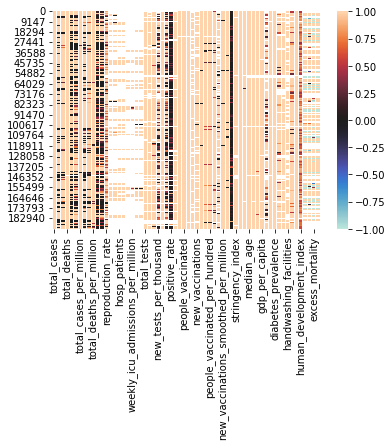

In [14]:
sns.heatmap(df.select_dtypes(include = np.number), vmin=-1, vmax=1, center=0)

In [15]:
plt.show()

In [16]:
location_df = df[df['location'].isin(["Nepal","China","India"])]

<function matplotlib.pyplot.show>

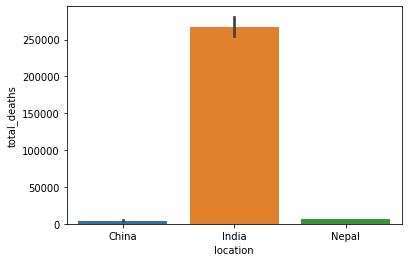

In [17]:
sns.barplot(x="location",y="total_deaths",data =location_df)
plt.show

In [18]:
location_df = location_df[columns]

In [19]:
location_df

,new_cases,location,total_deaths,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
35527,NaN,China,17.0,1.9,48.4,NaN,4.34
35528,92.0,China,18.0,1.9,48.4,NaN,4.34
35529,277.0,China,26.0,1.9,48.4,NaN,4.34
35530,483.0,China,42.0,1.9,48.4,NaN,4.34
35531,663.0,China,56.0,1.9,48.4,NaN,4.34
...,...,...,...,...,...,...,...
121612,11.0,Nepal,11952.0,9.5,37.8,47.782,0.30
121613,19.0,Nepal,11952.0,9.5,37.8,47.782,0.30
121614,8.0,Nepal,11952.0,9.5,37.8,47.782,0.30
121615,9.0,Nepal,11952.0,9.5,37.8,47.782,0.30


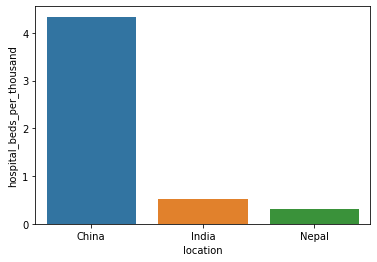

In [20]:
plt.figure()
sns.barplot(x="location",y="hospital_beds_per_thousand",data =location_df)

In [21]:
numeric_col = location_df.select_dtypes('number').columns
n = len(numeric_col)

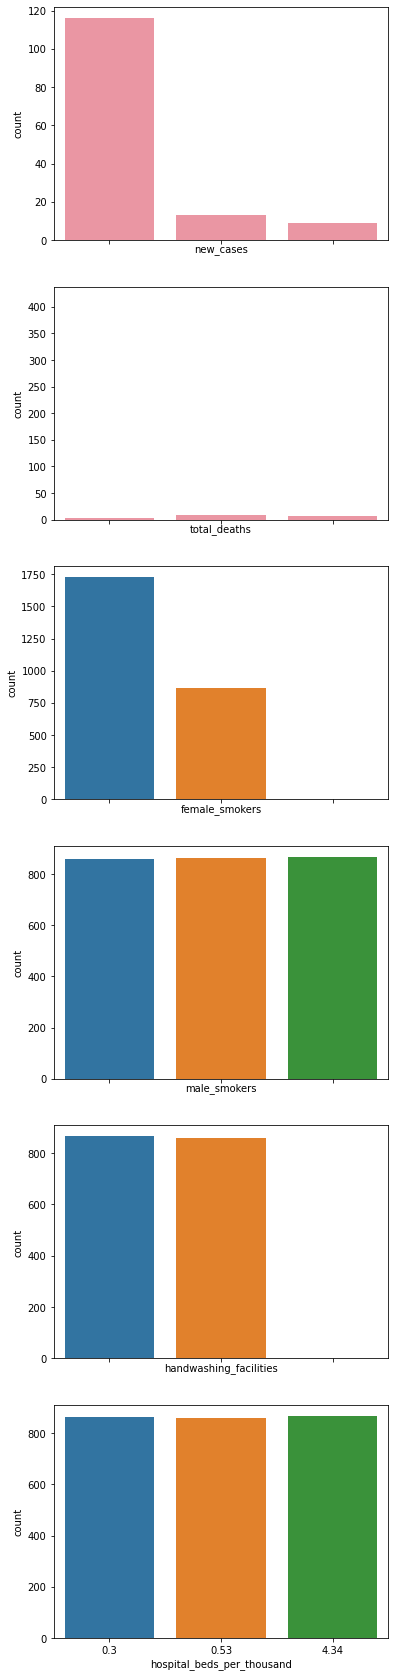

In [22]:
fig,ax = plt.subplots(n,1, figsize=(6,6*5), sharex=True)

for i,col in enumerate(numeric_col):
  plt.sca(ax[i])
  sns.countplot(x=col, data=location_df)

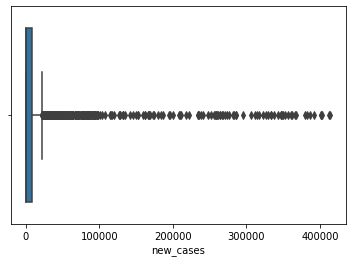

In [23]:
sns.boxplot(x="new_cases", data=location_df)

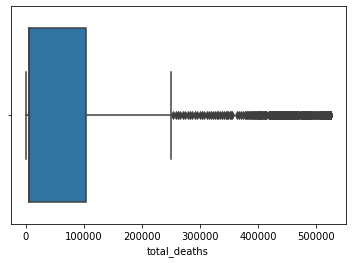

In [24]:
sns.boxplot(x="total_deaths", data=location_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


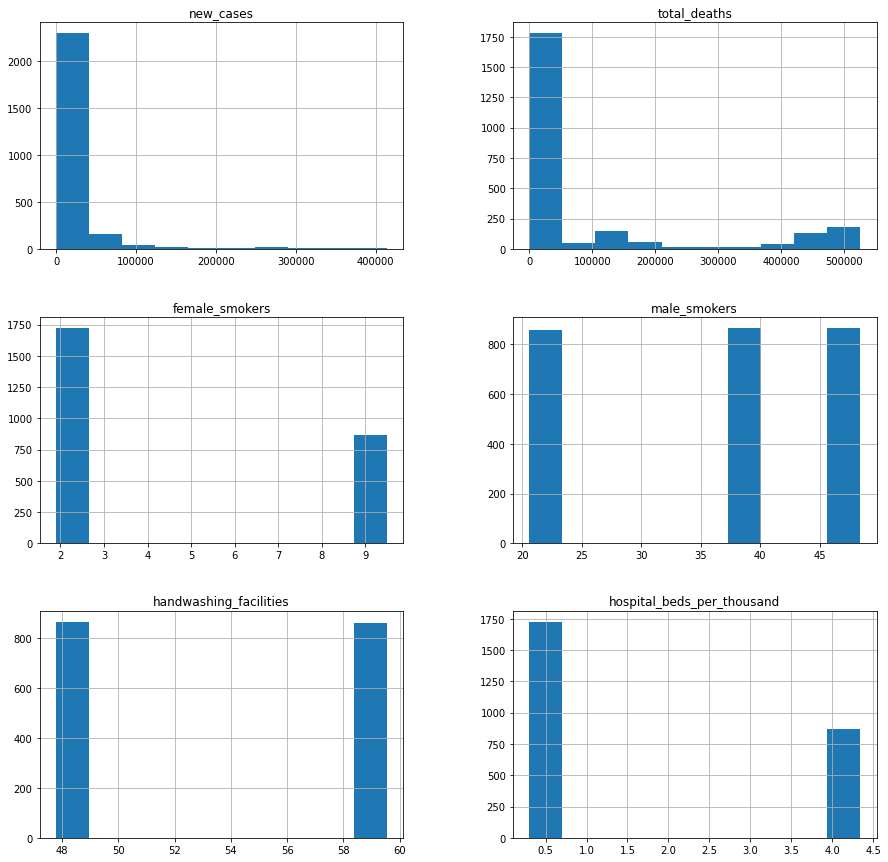

In [25]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
location_df.select_dtypes(include = np.number).hist(ax = ax)
plt.show()

In [26]:
selected_df = df[[ 'new_cases', 'total_deaths', 'female_smokers', 'male_smokers', 'handwashing_facilities' ,'hospital_beds_per_thousand']]

In [28]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
si = SimpleImputer(strategy="median")
selected_np = si.fit_transform(selected_df)

In [37]:
selected_df = pd.DataFrame(data=selected_np, columns=['new_cases','total_deaths', 'female_smokers', 'male_smokers', 'handwashing_facilities' ,'hospital_beds_per_thousand'])

In [42]:
selected_df.isnull().sum()

new_cases                     0
total_deaths                  0
female_smokers                0
male_smokers                  0
handwashing_facilities        0
hospital_beds_per_thousand    0
dtype: int64

In [43]:
X = selected_df.drop('new_cases', axis=1)
y = selected_df['new_cases']

In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192072 entries, 0 to 192071
Data columns (total 5 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   total_deaths                192072 non-null  float64
 1   female_smokers              192072 non-null  float64
 2   male_smokers                192072 non-null  float64
 3   handwashing_facilities      192072 non-null  float64
 4   hospital_beds_per_thousand  192072 non-null  float64
dtypes: float64(5)
memory usage: 7.3 MB


In [45]:
len(y)

192072

In [46]:
X.shape

(192072, 5)

In [47]:
st = StandardScaler()
X_std = st.fit_transform(X)

In [48]:
X_std.shape

(192072, 5)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size =42, random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression, ElasticNet

In [55]:
lr = LinearRegression()
en = ElasticNet()

In [56]:
lr.fit(X_train, y_train)
en.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_en = en.predict(X_test)

In [60]:
from sklearn.metrics import mean_absolute_error as mse

rmse_lr = mse(y_test, y_pred_lr)**(1/2)
rmse_en = mse(y_test, y_pred_en)**(1/2)

In [61]:
print(rmse_lr, rmse_en)

88.67803782762896 88.75353625233264


In [64]:
print(f"Coefficients: {lr.coef_} \n Intercept: {lr.intercept_}" )

Coefficients: [62421.84279391   129.15076567    75.77679162  -338.30810023
   961.70221452] 
 Intercept: 11816.423367970681


In [65]:
print(f"Coefficients: {en.coef_} \n Intercept: {en.intercept_}" )

Coefficients: [ 4.15927195e+04 -2.88215128e+01 -1.22460731e+01  2.65220287e+02
  3.46586718e+02] 
 Intercept: 11816.513214671477
